In [1]:
# loading the book

import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [29]:
# define the RNN class

class RNN(d2l.Module):  #@save
    def __init__(self, num_inputs, num_hiddens):
        super().__init__()
        self.save_hyperparameters()
        self.rnn = nn.RNN(num_inputs, num_hiddens)

    def forward(self, inputs, H=None):
        return self.rnn(inputs, H)

In [3]:
class RNNLM(d2l.RNNLMScratch):  #@save
    def init_params(self):
        self.linear = nn.LazyLinear(self.vocab_size)
    def output_layer(self, hiddens):
        return self.linear(hiddens).swapaxes(0, 1)

In [4]:
# make a prediction with initialized weights

data = d2l.TimeMachine(batch_size=1024, num_steps=32)
rnn = RNN(num_inputs=len(data.vocab), num_hiddens=32)
model = RNNLM(rnn, vocab_size=len(data.vocab), lr=1)
model.predict('it has', 20, data.vocab)

/home/tian/anaconda3/envs/d2l/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


'it hasclxclxclxclxclxclxcl'

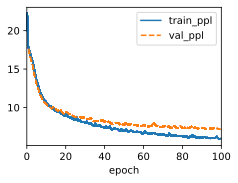

In [17]:
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [19]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

'it has of the the the the '

In [28]:
model.zero_grad
rnn2 = RNN(num_inputs=len(data.vocab), num_hiddens=32, nonlinearity='relu')
model = RNNLM(rnn2, vocab_size=len(data.vocab), lr=1)


TypeError: 'str' object cannot be interpreted as an integer